In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib

n=2
fs = 'xx-large'

def leapfrog_kdk(r1, v1, m1, r2, v2, m2, dt): #G=1 #questo non funge
    # acci
    dr = r2 - r1
    dist = np.sqrt(dr.dot(dr))
    a1 = dr * (m2 / (dist*dist*dist))
    a2 = -a1 * (m1 / m2)
    print(a1,a2)
    # kick
    v1h = v1 + a1 * (dt * 0.5)
    v2h = v2 + a2 * (dt * 0.5)
    print(v1h,v2h)
    #drift
    r1 += v1h * dt
    r2 += v2h * dt
    print(r1,r2)
    # accf
    dr = r2 - r1
    dist = np.sqrt(dr.dot(dr))
    a1 = dr * (m2 / (dist*dist*dist))
    a2 = -a1 * (m1 / m2)
    print(a1,a2)
    #kick
    v1 = v1h + a1 * (dt * 0.5)
    v2 = v2h + a2 * (dt * 0.5)
    print(v1,v2)
    
def leapfrog_constdt(r1, v1, m1, r2, v2, m2, dt): #G=1 #questo funge
    # acci
    dr = r2 - r1
    dist = np.sqrt(dr.dot(dr))
    ai1 = dr * (m2 / (dist*dist*dist))
    ai2 = -ai1 * (m1 / m2)
    #drift
    r1 += v1 * dt + ai1 * dt*dt*0.5
    r2 += v2 * dt + ai2 * dt*dt*0.5
    # accf
    dr = r2 - r1
    dist = np.sqrt(dr.dot(dr))
    af1 = dr * (m2 / (dist*dist*dist))
    af2 = -af1 * (m1 / m2)
    #kick
    v1 += (ai1+af1) * (dt * 0.5)
    v2 += (ai2+af2) * (dt * 0.5)

In [5]:
'''binary'''
# rcom = np.array([0.0, 0.0, 0.0])
# vcom = np.array([0.0, 0.0, 0.0])
rcom = np.array([1.7160849397517894, -1.0683636461606429, 1.1334781033758972])
vcom = np.array([-0.3716951262261775, -0.1149622205602265, 0.2048599117939647])
m1 = 0.0029708321137093
m2 = 0.0012239957713068
M = m1 + m2
sep = 0.0001
'''parametri qui sopra'''

#queste dal com
x1 = sep * m1 / M
x2 = - sep * m2 / M
#queste da Etot=0 e conservazione quantita di moto
vy1 = - np.sqrt((1 / sep) * (m2 / (1 + m1/m2)))
vy2 = np.sqrt((1 / sep) * (m1 / (1 + m2/m1)))


r1 = np.copy(rcom) ; r1[0] += x1
r2 = np.copy(rcom) ; r2[0] += x2
v1 = np.copy(vcom) ; v1[1] += vy1
v2 = np.copy(vcom) ; v2[1] += vy2
print("r1v1= %1.16f %1.16f %1.16f %1.16f %1.16f %1.16f"%(r1[0], r1[1], r1[2], v1[0], v1[1], v1[2]))
print("r2v2= %1.16f %1.16f %1.16f %1.16f %1.16f %1.16f"%(r2[0], r2[1], r2[2], v2[0], v2[1], v2[2]))

# provo un evoluzione stupida:
syst = 0
T = 0.1
dt = 0.00001
nstep = int(T/dt)

r1evo = np.zeros((nstep+1,3), dtype=float)
r2evo = np.zeros((nstep+1,3), dtype=float)
v1evo = np.zeros((nstep+1,3), dtype=float)
v2evo = np.zeros((nstep+1,3), dtype=float)
r1evo[0,:] = r1
r2evo[0,:] = r2
v1evo[0,:] = v1
v2evo[0,:] = v2

for i in range(1,nstep+1,1):
    leapfrog_constdt(r1, v1, m1, r2, v2, m2, dt)
    r1evo[i,:] = r1
    r2evo[i,:] = r2
    v1evo[i,:] = v1
    v2evo[i,:] = v2
    syst += dt

r1v1= 1.7161557610630600 -1.0683636461606429 1.1334781033758972 -0.3716951262261775 -2.0047926790187667 0.2048599117939647
r2v2= 1.7160557610630600 -1.0683636461606429 1.1334781033758972 -0.3716951262261775 4.4719564167978216 0.2048599117939647


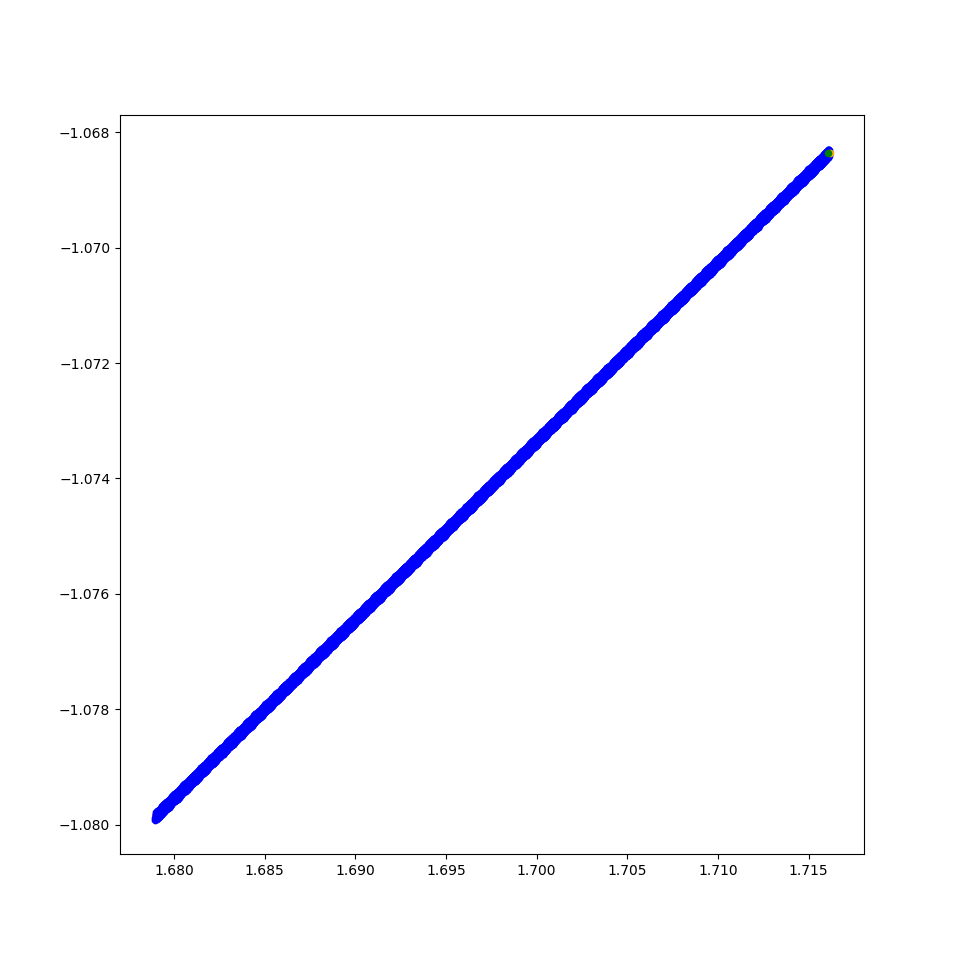

In [3]:
%matplotlib widget

_ = plt.close()
_ = plt.figure(0,figsize=[n*4.8,n*4.8])
_ = plt.scatter(r1evo[:,0], r1evo[:,1], s=10, color='red')
_ = plt.scatter(r2evo[:,0], r2evo[:,1], s=10, color='blue')
_ = plt.scatter(r1evo[0,0], r1evo[0,1], s=20, color='orange')
_ = plt.scatter(r2evo[0,0], r2evo[0,1], s=20, color='green')
_ = plt.show()

# _ = plt.figure(1,figsize=[n*4.8,n*4.8])
# _ = plt.quiver(r1evo[0,0], r1evo[0,1], v1evo[0,0], v1evo[0,1], color='orange')
# _ = plt.quiver(r2evo[0,0], r2evo[0,1], v2evo[0,0], v2evo[0,1], color='green')
# _ = plt.quiver(r1evo[:,0], r1evo[:,1], v1evo[:,0], v1evo[:,1], color='red')
# _ = plt.quiver(r2evo[:,0], r2evo[:,1], v2evo[:,0], v2evo[:,1], color='blue')
